Import cell as markdown

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
start_date = '1990-01-01'
end_date = '2024-08-1'

# Set the ticker
ticker = 'AAPL'

# Get the data
data = yf.download(ticker, start_date, end_date, group_by=ticker, auto_adjust=False)[ticker]
data = data.reset_index()
fig = px.line(data, x='Date', y=['Open', 'High', 'Low', 'Close'])


[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

Price,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-01-02,0.314732,0.334821,0.312500,0.332589,0.261202,183198400
1,1990-01-03,0.339286,0.339286,0.334821,0.334821,0.262955,207995200
2,1990-01-04,0.341518,0.345982,0.332589,0.335938,0.263832,221513600
3,1990-01-05,0.337054,0.341518,0.330357,0.337054,0.264709,123312000
4,1990-01-08,0.334821,0.339286,0.330357,0.339286,0.266462,101572800


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8711 entries, 0 to 8710
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8711 non-null   datetime64[ns]
 1   Open       8711 non-null   float64       
 2   High       8711 non-null   float64       
 3   Low        8711 non-null   float64       
 4   Close      8711 non-null   float64       
 5   Adj Close  8711 non-null   float64       
 6   Volume     8711 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 476.5 KB


Text(0.5, 1.0, 'Amazon Opening Stock Value')

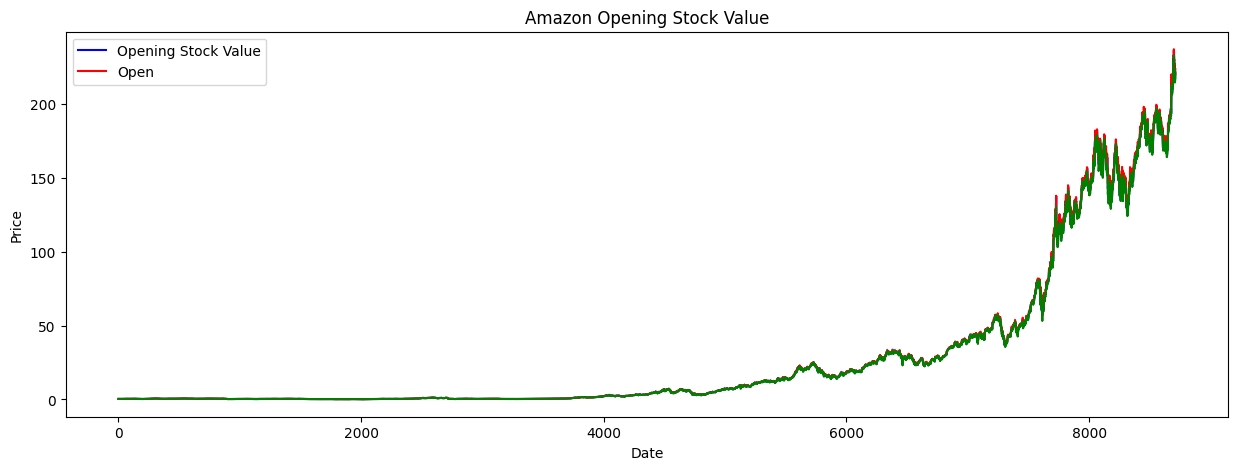

In [5]:
data['Open'].plot(color='blue', figsize=(15,5))
data['High'].plot(color='red', figsize=(15,5))
data['Low'].plot(color='green', figsize=(15,5))


plt.legend(['Opening Stock Value', 'Open'])
plt.ylabel('Price')
plt.xlabel('Date')
plt.title("Amazon Opening Stock Value")

In [6]:
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                                     open=data['Open'],
                                     high = data['High'],
                                     low = data['Low'],
                                     close = data['Close'])])
fig.update_layout(title='AMZN Candlestick Chart', xaxis_title='Date', yaxis_title='Price')

# Display the figure
fig.show()

In [ ]:
# SMA Simple Moving Average
# Number of days to calculate SMA
window_size = 5

# Calculate the Simple Moving Average
data['Simple Moving Average'] = data['Close'].rolling(window=window_size).mean()

data.head()


Price,Date,Open,High,Low,Close,Adj Close,Volume,Simple Moving Average
0,1990-01-02,0.314732,0.334821,0.312500,0.332589,0.261202,183198400,NaN
1,1990-01-03,0.339286,0.339286,0.334821,0.334821,0.262955,207995200,NaN
2,1990-01-04,0.341518,0.345982,0.332589,0.335938,0.263832,221513600,NaN
3,1990-01-05,0.337054,0.341518,0.330357,0.337054,0.264709,123312000,NaN
4,1990-01-08,0.334821,0.339286,0.330357,0.339286,0.266462,101572800,0.335938


In [8]:
data['Close'][2] - data['Close'][1]

np.float64(0.001117020845413208)

In [9]:

# up = 0
# down = 0
consec_up = 0
consec_down = 0
max_up = 0
max_down = 0

for i in range(1,len(data)):
    if data['Close'][i]-data['Close'][i-1] > 0:
        consec_up +=1
        consec_down = 0
        print('Consecutive up :', consec_up)
        if consec_up > max_up:
            max_up = consec_up
    else:
        consec_down +=1
        consec_up = 0
        print('Consecutive down :', consec_down)
        if consec_down > max_down:
            max_down = consec_down





Consecutive up : 1
Consecutive up : 2
Consecutive up : 3
Consecutive up : 4
Consecutive down : 1
Consecutive down : 2
Consecutive down : 3
Consecutive down : 4
Consecutive down : 5
Consecutive up : 1
Consecutive down : 1
Consecutive down : 2
Consecutive up : 1
Consecutive down : 1
Consecutive up : 1
Consecutive up : 2
Consecutive up : 3
Consecutive down : 1
Consecutive up : 1
Consecutive up : 2
Consecutive down : 1
Consecutive down : 2
Consecutive up : 1
Consecutive up : 2
Consecutive down : 1
Consecutive down : 2
Consecutive down : 3
Consecutive up : 1
Consecutive down : 1
Consecutive up : 1
Consecutive down : 1
Consecutive down : 2
Consecutive down : 3
Consecutive down : 4
Consecutive up : 1
Consecutive down : 1
Consecutive up : 1
Consecutive up : 2
Consecutive down : 1
Consecutive up : 1
Consecutive up : 2
Consecutive down : 1
Consecutive up : 1
Consecutive up : 2
Consecutive up : 3
Consecutive up : 4
Consecutive up : 5
Consecutive down : 1
Consecutive up : 1
Consecutive up : 2
Cons

In [10]:
print('Max upward days is: ', max_up,'days')
print('Max downward days is: ', max_down,'days')

Max upward days is:  12 days
Max downward days is:  11 days


Daily_profit=0
SimpleDailyReturn=0
TodayClosing=0
YesterdayClosing=0

Daily_profit = [(TodayClosing - YesterdayClosing)]   #Output will be in $ earned/lost
SimpleDailyReturn= (Daily_profit / YesterdayClosing) * 100      #Output will be in % earned/lost 

In [11]:
# returns = ((today close price - today yest price) / today yest price) * 100   # Number is in decimal, so *100 for percentage
# data['Close'][i] pulls the close column
for i in range(1, len(data)):
    price_diff = data['Close'][i]-data['Close'][i-1]
    daily_return = (price_diff / data['Close'][i]) * 100
    print("Simple daily return for day",i,"{:.2f}".format(daily_return),"%.")

Simple daily return for day 1 0.67 %.
Simple daily return for day 2 0.33 %.
Simple daily return for day 3 0.33 %.
Simple daily return for day 4 0.66 %.
Simple daily return for day 5 -1.00 %.
Simple daily return for day 6 -4.51 %.
Simple daily return for day 7 -4.35 %.
Simple daily return for day 8 0.00 %.
Simple daily return for day 9 -0.73 %.
Simple daily return for day 10 1.79 %.
Simple daily return for day 11 -4.89 %.
Simple daily return for day 12 -2.70 %.
Simple daily return for day 13 5.47 %.
Simple daily return for day 14 -3.01 %.
Simple daily return for day 15 1.48 %.
Simple daily return for day 16 0.74 %.
Simple daily return for day 17 0.37 %.
Simple daily return for day 18 -4.20 %.
Simple daily return for day 19 1.50 %.
Simple daily return for day 20 2.21 %.
Simple daily return for day 21 0.00 %.
Simple daily return for day 22 -1.12 %.
Simple daily return for day 23 1.83 %.
Simple daily return for day 24 2.14 %.
Simple daily return for day 25 -0.72 %.
Simple daily return for 